# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
!pip install citipy

  Using cached citipy-0.0.6-py3-none-any.whl
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)


In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}&q={city}" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | flying fish cove
Processing Record 2 of Set 1 | zhangatas
Processing Record 3 of Set 1 | chernyshevskiy
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | kailua-kona
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | klyuchi
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | scarborough
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | crane
Processing Record 22 of Set 1 | v

Processing Record 38 of Set 4 | isafjordur
Processing Record 39 of Set 4 | aykhal
Processing Record 40 of Set 4 | ketchikan
Processing Record 41 of Set 4 | sambava
Processing Record 42 of Set 4 | anadyr
Processing Record 43 of Set 4 | afaahiti
Processing Record 44 of Set 4 | hohhot
Processing Record 45 of Set 4 | kapuskasing
Processing Record 46 of Set 4 | port douglas
Processing Record 47 of Set 4 | la puebla de montalban
Processing Record 48 of Set 4 | osakarovka
Processing Record 49 of Set 4 | kudahuvadhoo
Processing Record 0 of Set 5 | pandan
Processing Record 1 of Set 5 | alaghsas
Processing Record 2 of Set 5 | palikir - national government center
Processing Record 3 of Set 5 | smithers
Processing Record 4 of Set 5 | arraial do cabo
Processing Record 5 of Set 5 | portstewart
Processing Record 6 of Set 5 | katsuura
Processing Record 7 of Set 5 | acarau
Processing Record 8 of Set 5 | kalmunai
Processing Record 9 of Set 5 | laguna
Processing Record 10 of Set 5 | serdar
Processing Rec

Processing Record 29 of Set 8 | kone
Processing Record 30 of Set 8 | kampong thom
Processing Record 31 of Set 8 | tateyama
Processing Record 32 of Set 8 | olyokminsk
Processing Record 33 of Set 8 | usinsk
Processing Record 34 of Set 8 | kurumul
City not found. Skipping...
Processing Record 35 of Set 8 | pacific grove
Processing Record 36 of Set 8 | ajdabiya
Processing Record 37 of Set 8 | broome
Processing Record 38 of Set 8 | alofi
Processing Record 39 of Set 8 | camiri
Processing Record 40 of Set 8 | santa marta de ortigueira
Processing Record 41 of Set 8 | khon kaen
Processing Record 42 of Set 8 | yangor
City not found. Skipping...
Processing Record 43 of Set 8 | sangamner
Processing Record 44 of Set 8 | dunedin
Processing Record 45 of Set 8 | orel
Processing Record 46 of Set 8 | namibe
Processing Record 47 of Set 8 | anloga
Processing Record 48 of Set 8 | point pleasant
Processing Record 49 of Set 8 | badger
Processing Record 0 of Set 9 | vernon
Processing Record 1 of Set 9 | bundi

Processing Record 18 of Set 12 | el obeid
Processing Record 19 of Set 12 | saratamata
City not found. Skipping...
Processing Record 20 of Set 12 | guatrache
Processing Record 21 of Set 12 | fuerte olimpo
Processing Record 22 of Set 12 | hosa'ina
City not found. Skipping...
Processing Record 23 of Set 12 | gilau
Processing Record 24 of Set 12 | pechora
Processing Record 25 of Set 12 | porbandar
Processing Record 26 of Set 12 | kidal
Processing Record 27 of Set 12 | punta gorda
Processing Record 28 of Set 12 | reguiba
Processing Record 29 of Set 12 | bontang
Processing Record 30 of Set 12 | melfort
Processing Record 31 of Set 12 | porto novo
Processing Record 32 of Set 12 | brazzaville
Processing Record 33 of Set 12 | eastham
Processing Record 34 of Set 12 | cahri
City not found. Skipping...
Processing Record 35 of Set 12 | motueka
Processing Record 36 of Set 12 | selfoss
Processing Record 37 of Set 12 | sandnessjoen
Processing Record 38 of Set 12 | munuf
Processing Record 39 of Set 12 |

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,flying fish cove,-10.4217,105.6791,25.82,88,75,4.12,CX,1698269479
1,zhangatas,43.5667,69.7500,16.17,47,100,8.17,KZ,1698269644
2,chernyshevskiy,63.0128,112.4714,-7.51,97,100,1.73,RU,1698269645
3,jamestown,42.0970,-79.2353,21.68,35,0,4.12,US,1698269395
4,lebu,-37.6167,-73.6500,11.92,79,0,10.87,CL,1698269647


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,flying fish cove,-10.4217,105.6791,25.82,88,75,4.12,CX,1698269479
1,zhangatas,43.5667,69.7500,16.17,47,100,8.17,KZ,1698269644
2,chernyshevskiy,63.0128,112.4714,-7.51,97,100,1.73,RU,1698269645
3,jamestown,42.0970,-79.2353,21.68,35,0,4.12,US,1698269395
4,lebu,-37.6167,-73.6500,11.92,79,0,10.87,CL,1698269647


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

The correlation between both factors is -0.57


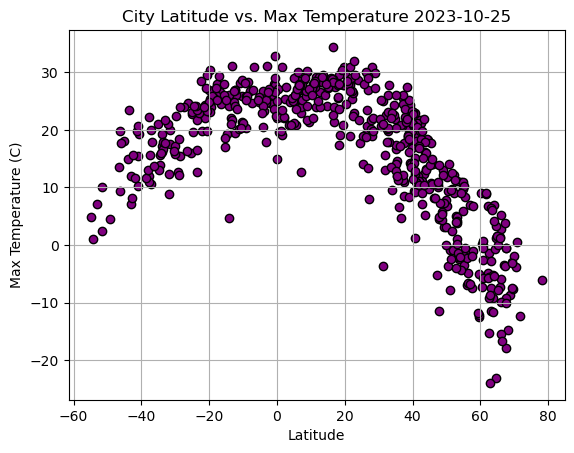

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", c='purple', edgecolor='black')
plt.title("City Latitude vs. Max Temperature 2023-10-25")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
correlation=st.pearsonr(city_data_df['Lat'],city_data_df['Max Temp'])
print(f'The correlation between both factors is {round(correlation[0],2)}')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

The correlation between both factors is 0.1


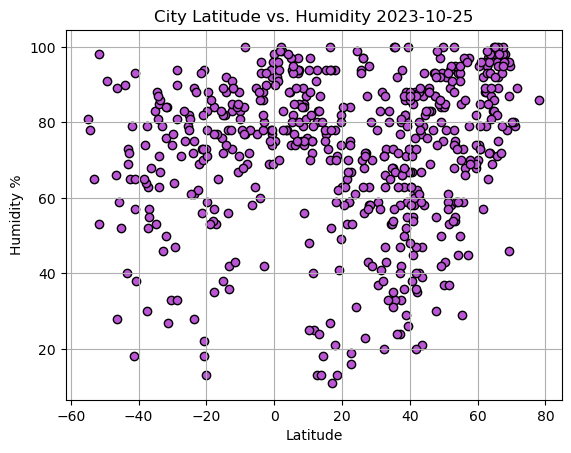

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", c='mediumorchid', edgecolor='black')
plt.title("City Latitude vs. Humidity 2023-10-25")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
correlation=st.pearsonr(city_data_df['Lat'],city_data_df['Humidity'])
print(f'The correlation between both factors is {round(correlation[0],2)}')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

The correlation between both factors is 0.08


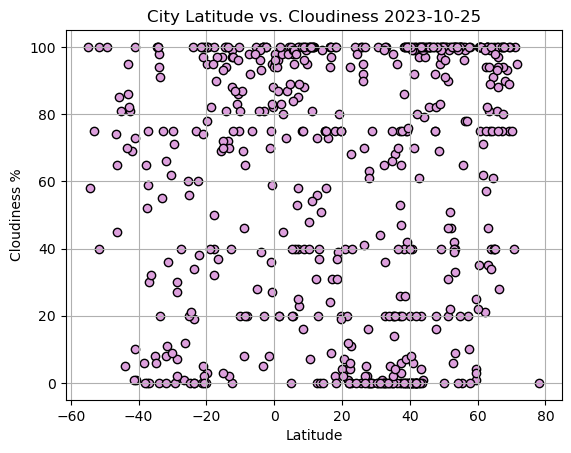

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", c='plum', edgecolor='black')
plt.title("City Latitude vs. Cloudiness 2023-10-25")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)
correlation=st.pearsonr(city_data_df['Lat'],city_data_df['Cloudiness'])
print(f'The correlation between both factors is {round(correlation[0],2)}')
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

The correlation between both factors is -0.11


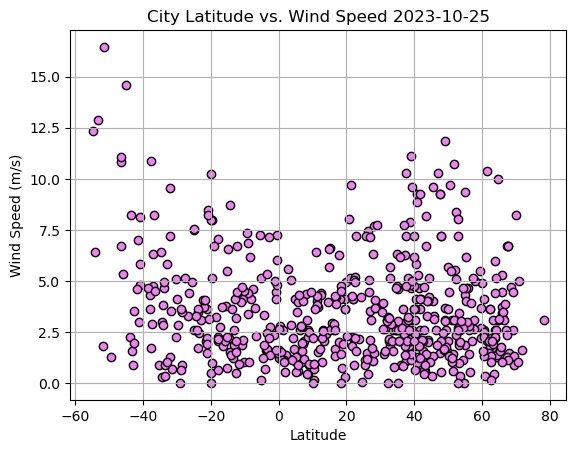

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", c='violet', edgecolor='black')
plt.title("City Latitude vs. Wind Speed 2023-10-25")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
correlation=st.pearsonr(city_data_df['Lat'],city_data_df['Wind Speed'])
print(f'The correlation between both factors is {round(correlation[0],2)}')
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-squared is: 0.32730006269118733


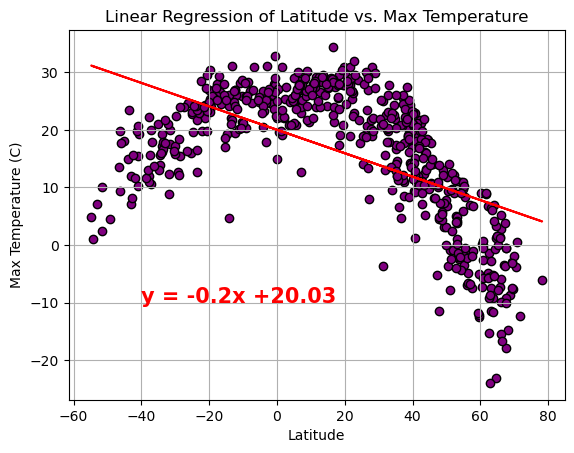

In [39]:
# Define a function to create Linear Regression plots
# Regression for Lat v Max Temp
x_value=city_data_df['Lat']
y_value=city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_value, y_value)
regress_values=x_value*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_value,y_value, marker="o", c='purple', edgecolor='black')
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-40,-10),fontsize=15,color="red", fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Linear Regression of Latitude vs. Max Temperature")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig1a.png")
plt.show()

There is a negative correlation between Latitude and Max Temperature. The r value is 0.32 which indicates a weak correlation between these two variables. 

The r-squared is: 0.010484614612115733


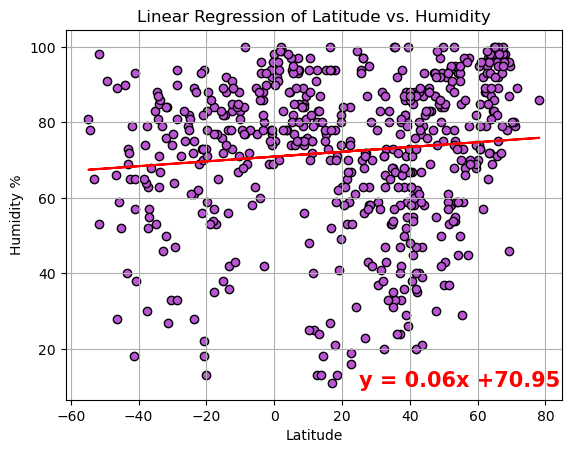

In [38]:
# Define a function to create Linear Regression plots
# Regression for Lat v Humidity
a_value=city_data_df['Lat']
b_value=city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr)=linregress(a_value, b_value)
regress_values=a_value*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(a_value,b_value, marker="o", c='mediumorchid', edgecolor='black')
plt.plot(a_value,regress_values,"r-")
plt.annotate(line_eq,(25,10),fontsize=15,color="red", fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("Linear Regression of Latitude vs. Humidity")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig2a.png")
plt.show()

The r-squared is: 0.006278942264341607


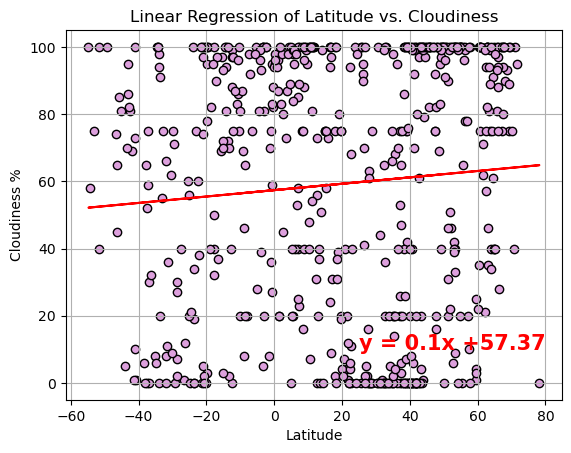

In [43]:
# Define a function to create Linear Regression plots
# Regression for Lat v Cloudiness
c_value=city_data_df['Lat']
d_value=city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr)=linregress(c_value, d_value)
regress_values=c_value*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(c_value,d_value, marker="o", c='plum', edgecolor='black')
plt.plot(c_value,regress_values,"r-")
plt.annotate(line_eq,(25,10),fontsize=15,color="red", fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("Linear Regression of Latitude vs. Cloudiness")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig3a.png")
plt.show()

This analysis shows there is no correlation between Latitude and Cloudiness. The r value indicates no correlation, and the linear regression formula shows there would be no way to predict cloudiness based on Latitude. 

The r-squared is: 0.012932295135259802


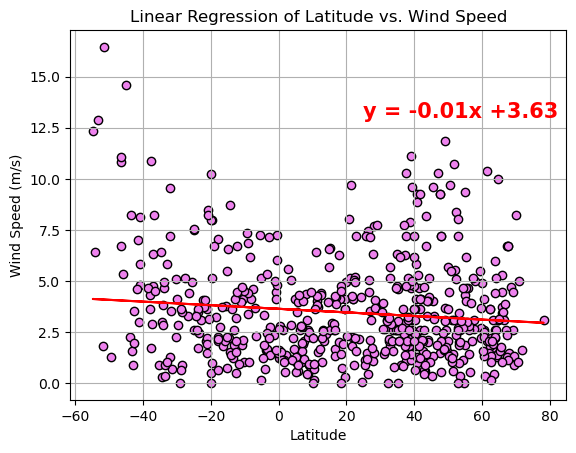

In [45]:
# Define a function to create Linear Regression plots
# Regression for Lat v Wind Speed
e_value=city_data_df['Lat']
f_value=city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr)=linregress(e_value, f_value)
regress_values=e_value*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(e_value,f_value, marker="o", c='violet', edgecolor='black')
plt.plot(e_value,regress_values,"r-")
plt.annotate(line_eq,(25,13),fontsize=15,color="red", fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("Linear Regression of Latitude vs. Wind Speed")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig4a.png")
plt.show()

Similar to the lack of correlation between latitude and Cloudiness, there is a very slight negative correlation between latitude and Windspeed. This correlation, however, is extremely small and in accordance to the r value the strength of the correlation is almost none. 

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,zhangatas,43.5667,69.7500,16.17,47,100,8.17,KZ,1698269644
2,chernyshevskiy,63.0128,112.4714,-7.51,97,100,1.73,RU,1698269645
3,jamestown,42.0970,-79.2353,21.68,35,0,4.12,US,1698269395
5,kailua-kona,19.6406,-155.9956,30.89,74,20,4.12,US,1698269648
10,klyuchi,52.2667,79.1667,12.15,58,100,8.37,RU,1698269654


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,flying fish cove,-10.4217,105.6791,25.82,88,75,4.12,CX,1698269479
4,lebu,-37.6167,-73.6500,11.92,79,0,10.87,CL,1698269647
6,puerto natales,-51.7236,-72.4875,2.48,98,100,1.83,CL,1698269649
7,waitangi,-43.9535,-176.5597,14.90,90,5,2.24,NZ,1698269650
8,ushuaia,-54.8000,-68.3000,4.81,81,100,12.35,AR,1698269651


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7102753110787321


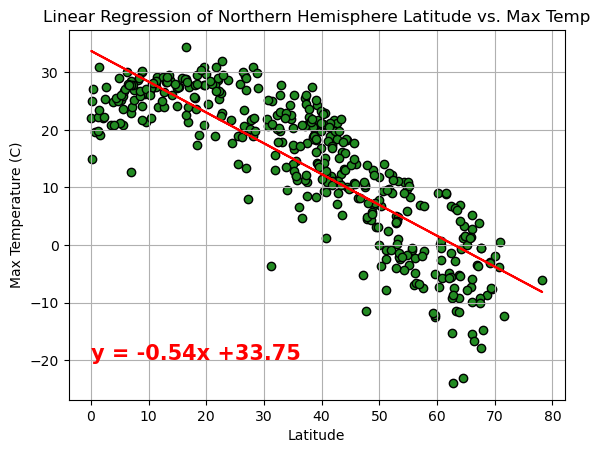

In [57]:
# Linear regression on Northern Hemisphere
g_value=northern_hemi_df['Lat']
h_value=northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr)=linregress(g_value, h_value)
regress_values=g_value*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(g_value,h_value, marker="o", c='forestgreen', edgecolor='black')
plt.plot(g_value,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red", fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Linear Regression of Northern Hemisphere Latitude vs. Max Temp")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig5.png")
plt.show()

There is a negative correlation between Northern Hemisphere latitude and Max temperatures. According to the r value, there is a strong correlation between these two variables. Thus the larger value in latitude corresponds with a lower max temperature. This linear regression shows that predicting max temperatures would be quite possible depending on latitude. 

The r-squared is: 0.5608406254838354


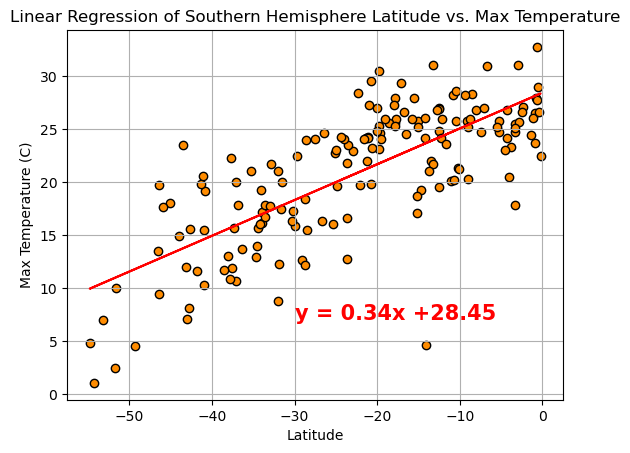

In [61]:
# Linear regression on Southern Hemisphere
i_value=southern_hemi_df['Lat']
j_value=southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr)=linregress(i_value, j_value)
regress_values=i_value*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(i_value,j_value, marker="o", c='darkorange', edgecolor='black')
plt.plot(i_value,regress_values,"r-")
plt.annotate(line_eq,(-30,7),fontsize=15,color="red", fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("Linear Regression of Southern Hemisphere Latitude vs. Max Temperature")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig6.png")
plt.show()

There is a positive correlation between latitude and max temperature in the Southern Hemisphere. According to the r value, there is a moderate correlation between these two variables. Thus the lower max temperature values correspond to the lower values of latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.010816919944629967


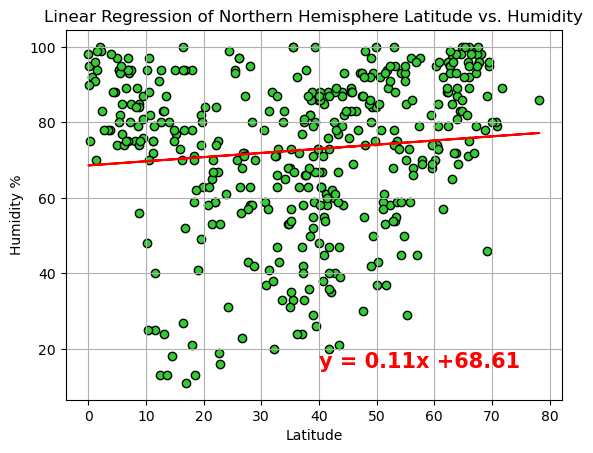

In [60]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
k_value=northern_hemi_df['Lat']
l_value=northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr)=linregress(k_value, l_value)
regress_values=k_value*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(k_value,l_value, marker="o", c='limegreen', edgecolor='black')
plt.plot(k_value,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red", fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("Linear Regression of Northern Hemisphere Latitude vs. Humidity")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig7.png")
plt.show()

The r-squared is: 0.05420199095438212


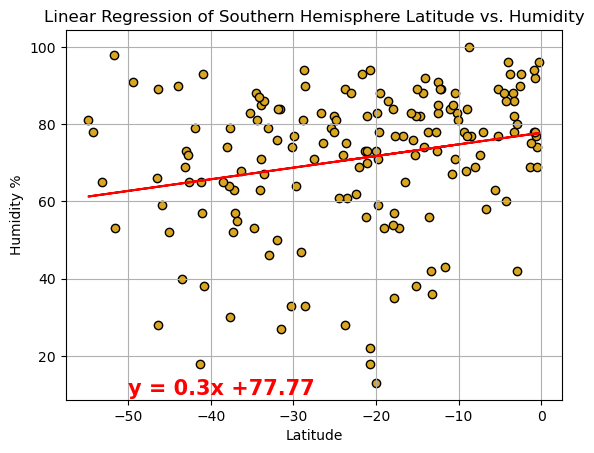

In [64]:
# Southern Hemisphere
m_value=southern_hemi_df['Lat']
n_value=southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr)=linregress(m_value, n_value)
regress_values=m_value*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(m_value,n_value, marker="o", c='goldenrod', edgecolor='black')
plt.plot(m_value,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red", fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title("Linear Regression of Southern Hemisphere Latitude vs. Humidity")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig8.png")
plt.show()

The relationship between latitude and humidity is a very slight positive correlation in both the southern and northern hemispheres. However, according to the r value for both hemispheres the strength of this correlation is very weak and almost non existent.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.012033783463211326


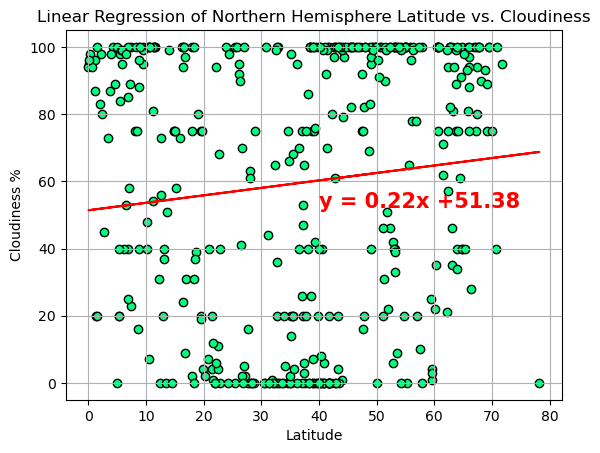

In [68]:
# Northern Hemisphere
o_value=northern_hemi_df['Lat']
p_value=northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr)=linregress(o_value, p_value)
regress_values=o_value*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(o_value,p_value, marker="o", c='springgreen', edgecolor='black')
plt.plot(o_value,regress_values,"r-")
plt.annotate(line_eq,(40,52),fontsize=15,color="red", fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("Linear Regression of Northern Hemisphere Latitude vs. Cloudiness")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig9.png")
plt.show()

The r-squared is: 0.02901101494718608


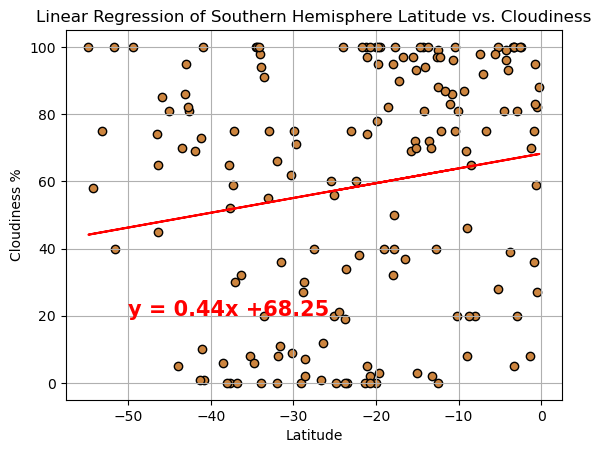

In [71]:
# Southern Hemisphere
q_value=southern_hemi_df['Lat']
r_value=southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr)=linregress(q_value, r_value)
regress_values=q_value*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(q_value,r_value, marker="o", c='peru', edgecolor='black')
plt.plot(q_value,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red", fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title("Linear Regression of Southern Hemisphere Latitude vs. Cloudiness")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig10.png")
plt.show()

Similar to the relationship between latitude and humidity, there is almost no correlation between latitude and cloudiness in both hemispheres according to their r values. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.014371495556482154


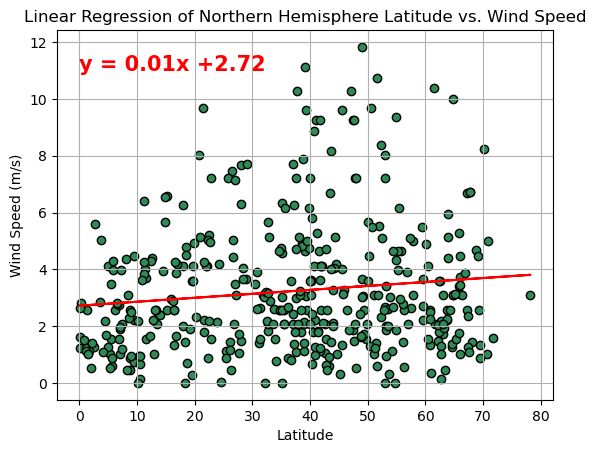

In [73]:
# Northern Hemisphere
s_value=northern_hemi_df['Lat']
t_value=northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr)=linregress(s_value, t_value)
regress_values=s_value*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(s_value,t_value, marker="o", c='seagreen', edgecolor='black')
plt.plot(s_value,regress_values,"r-")
plt.annotate(line_eq,(0,11),fontsize=15,color="red", fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("Linear Regression of Northern Hemisphere Latitude vs. Wind Speed")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig11.png")
plt.show()

The r-squared is: 0.0994513526115906


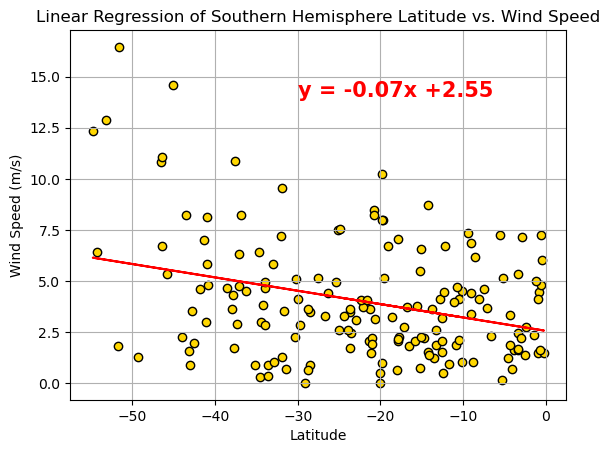

In [76]:
# Southern Hemisphere
u_value=southern_hemi_df['Lat']
v_value=southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr)=linregress(u_value, v_value)
regress_values=u_value*slope+intercept
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(u_value,v_value, marker="o", c='gold', edgecolor='black')
plt.plot(u_value,regress_values,"r-")
plt.annotate(line_eq,(-30,14),fontsize=15,color="red", fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("Linear Regression of Southern Hemisphere Latitude vs. Wind Speed")
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output_data/Fig12.png")
plt.show()

Again, as seen with the variables of cloudiness and humidity, there is little to no correlation between wind speed and latitude for both hemispheres. However in the northern hemisphere there seems to be a bit of a positive correlation between latitude and windspeed, while in the southern hemisphere there is a negative correlation. Yet, the r value for both hemispheres indicates little to no correlation. 